# **Predicting and Testing of Numbers**

## **Importing Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading my trained Model**

In [ ]:
model = load_model("/content/drive/MyDrive/Assessment/Computer vision/models/Advance_model.keras")

### **Loading my testing data**

In [ ]:
image1 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/000.png"
image2 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/001.png"
image3 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/002.png"
image4 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/003.png"
image5 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/004.png"
image6 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/005.png"
image7 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/006.png"
image8 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/007.png"
image9 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/008.png"
image10 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/009.png"
image11 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/010.png"
image12 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/011.png"
image13 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/012.png"
image14 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/013.png"
image15 = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/014.png"

# **Predicting the first 10 images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


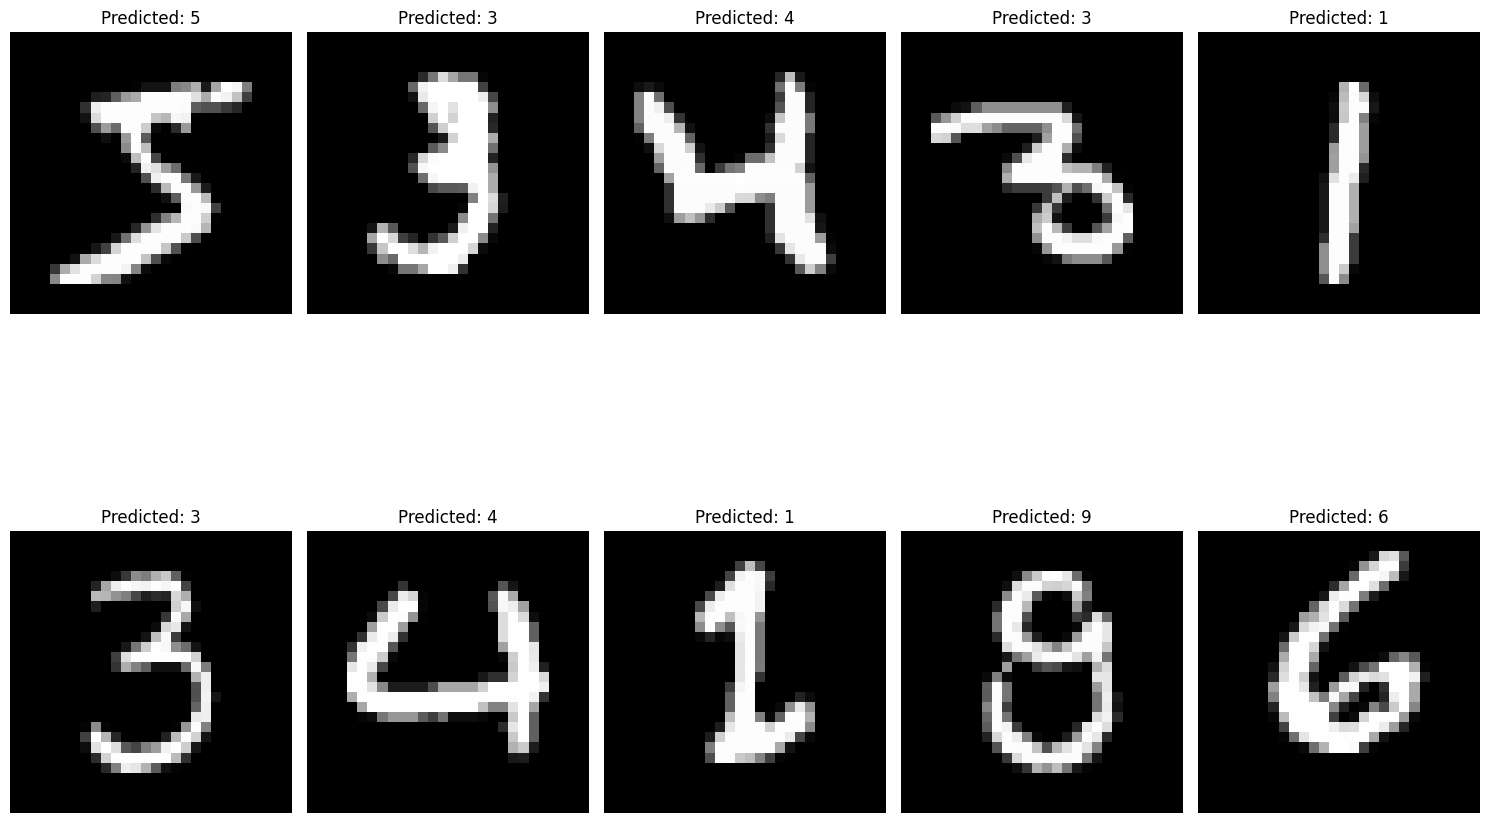

In [ ]:
def predict_images(image_paths):
    num_images = len(image_paths)
    num_cols = 5
    num_rows = (num_images + num_cols - 1)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.reshape(1, 28, 28, 1) / 255.0
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)

        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].set_title(f"Predicted: {predicted_label}")
        axes[i].axis('off')


    for n in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[n])

    plt.tight_layout()
    plt.show()

# image path to predict here
image_paths = [image1,image2,image3,image4,image5,image6,image7,image8,image9,image10]
predict_images(image_paths)


### **Functions for numbers segmentation and feature extraction**

In [ ]:
def predict_digits_from_image(image_path):
    try:
        #Load the image to predict
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Image not found at: {image_path}")

        #Segment the image into individual numbers
        _, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

        digit_images = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            digit = image[y:y+h, x:x+w]
            resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
            normalized_digit = resized_digit / 255.0
            digit_images.append(normalized_digit)



        # 4. Predict the numbers
        digit_images = np.array(digit_images).reshape(-1, 28, 28, 1)
        predictions = model.predict(digit_images)
        predicted_digits = np.argmax(predictions, axis=1)

        # 5. Plot the results
        plt.figure(figsize=(10, 5))
        for i, digit in enumerate(digit_images):
            plt.subplot(5, 5, i + 1)
            plt.imshow(digit.reshape(28, 28), cmap='gray')
            plt.title(str(predicted_digits[i]))
            plt.axis('off')

        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


### **Other Image Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 916ms/step


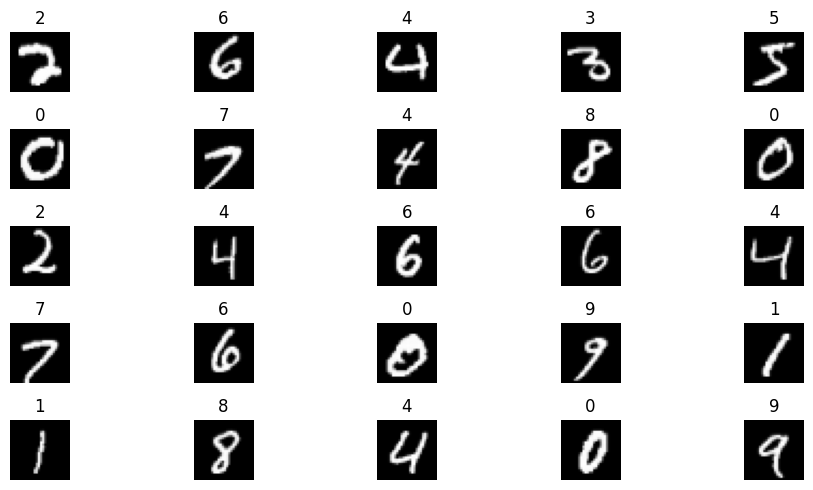

In [ ]:
predict_digits_from_image(image11)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


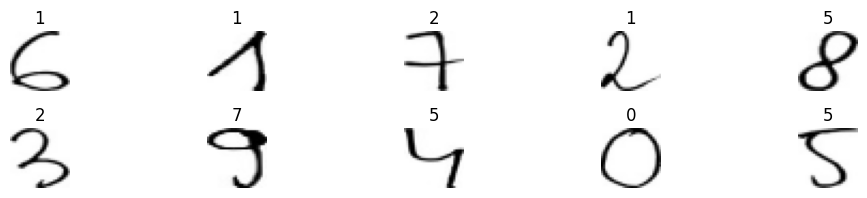

In [ ]:
predict_digits_from_image(image12)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


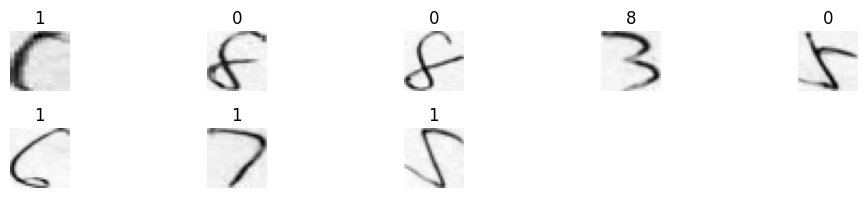

In [ ]:
predict_digits_from_image(image13)

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
An unexpected error occurred: num must be an integer with 1 <= num <= 25, not 26


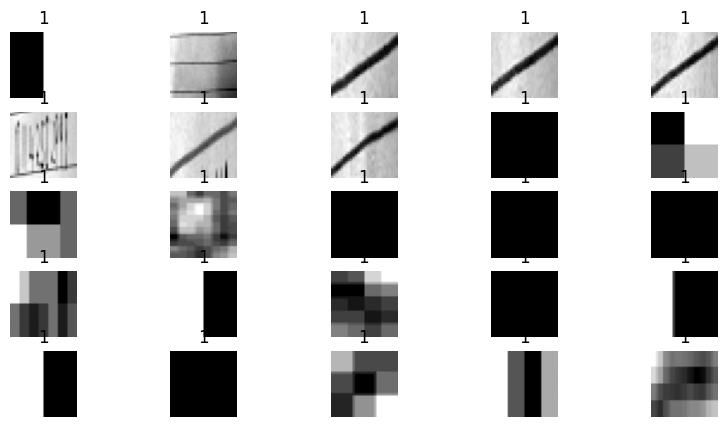

In [ ]:
predict_digits_from_image(image14)

122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
An unexpected error occurred: num must be an integer with 1 <= num <= 25, not 26


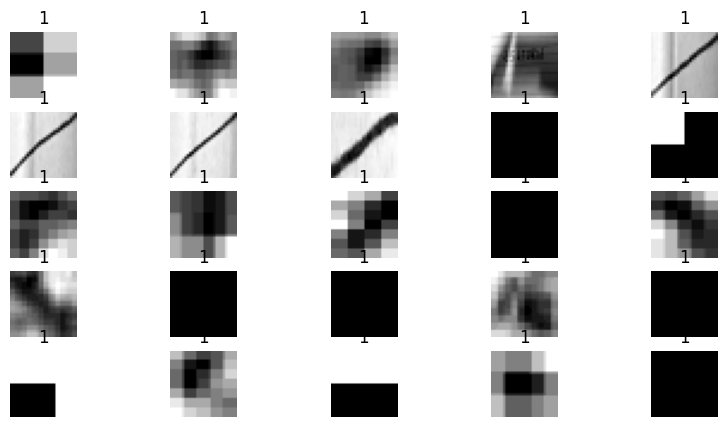

In [ ]:
predict_digits_from_image(image15)

### **Working on the video**

In [ ]:
from google.colab.patches import cv2_imshow
# Open the video file
video_path = "/content/drive/MyDrive/Assessment/Computer vision/Number_Test_Data/015.avi"
cap = cv2.VideoCapture(video_path)

frame_count = 0
predictions = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop when video ends

    frame_count += 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)  # Apply thresholding

    # Find contours (potential digits)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_digits = []
    digit_positions = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 10 < w < 100 and 20 < h < 100:  # Filter small noise
            digit_roi = thresh[y:y+h, x:x+w]
            digit_roi = cv2.resize(digit_roi, (28, 28))  # Resize to MNIST size
            digit_roi = digit_roi.astype("float32") / 255.0  # Normalize
            digit_roi = np.expand_dims(digit_roi, axis=-1)  # Add channel dimension
            digit_roi = np.expand_dims(digit_roi, axis=0)  # Add batch dimension

            # Predict digit using trained model
            prediction = np.argmax(model.predict(digit_roi), axis=-1)[0]
            detected_digits.append(prediction)
            digit_positions.append((x, y, w, h))

    predictions.append((frame_count, detected_digits))

    # Draw predictions on the frame
    for i, (x, y, w, h) in enumerate(digit_positions):
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, str(detected_digits[i]), (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display the frame using cv2_imshow instead of cv2.imshow
    cv2_imshow(frame) # Changed from cv2.imshow to cv2_imshow
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

# Plot predictions
frame_numbers, predicted_digits = zip(*predictions)
plt.figure(figsize=(10, 5))
plt.plot(frame_numbers, [sum(d) if d else 0 for d in predicted_digits], marker="o", linestyle="--", color="b")
plt.xlabel("Frame Number")
plt.ylabel("Predicted Digit Sum")
plt.title("Predicted Digits Across Video Frames")
plt.grid()
plt.show()

Output hidden; open in https://colab.research.google.com to view.